In [5]:
import pandas as pd
from pathlib import Path


path = Path("/home/estevaosilva/PycharmProjects/NCIA/ATIVIDADES/RNN/CTA_-_Ridership_-_Daily_Boarding_Totals_20260120.csv")
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"]
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1)
df = df.drop_duplicates()
df.head()


,day_type,bus,rail
date,,,
2001-01-01,U,297.192,126.455
2001-01-02,W,780.827,501.952
2001-01-03,W,824.923,536.432
2001-01-04,W,870.021,550.011
2001-01-05,W,890.426,557.917


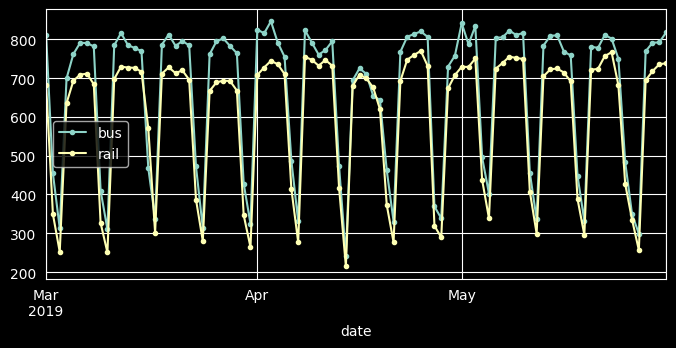

In [8]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"]

df = (
    df.sort_values("date")
      .set_index("date")
      .drop(columns="total")
      .drop_duplicates()
)

df.index = pd.to_datetime(df.index)

# Converter bus/rail para número (lidando com lixo comum)
for c in ["bus", "rail"]:
    df[c] = (
        df[c].astype(str)
             .str.replace(r"[^\d\-\.,]", "", regex=True)  # remove texto/espacos
             .str.replace(",", "", regex=False)          # se tiver separador de milhar
    )
    df[c] = pd.to_numeric(df[c], errors="coerce")

# (opcional) remover linhas onde faltou número
df = df.dropna(subset=["bus", "rail"])

df.loc["2019-03":"2019-05", ["bus", "rail"]].plot(
    grid=True, marker=".", figsize=(8, 3.5)
)
plt.show()


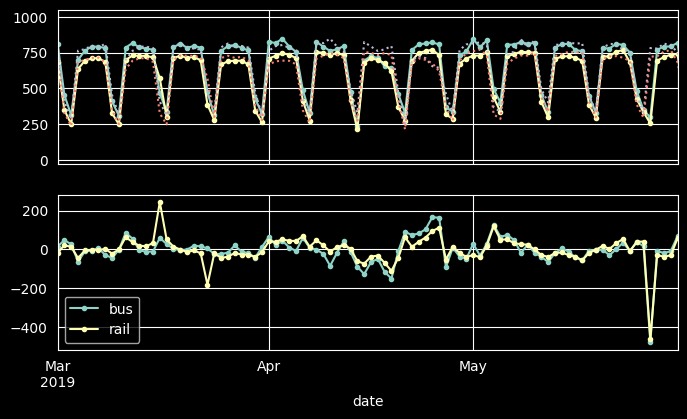

In [9]:
diff_7 = df[["bus", "rail"]].diff(7)["2019-03":"2019-05"]
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
df.plot(ax=axs[0], legend=False, marker=".") # original time series
df.shift(7).plot(ax=axs[0], grid=True, legend=False, linestyle=":") # lagged
diff_7.plot(ax=axs[1], grid=True, marker=".")
# 7-day difference time series
plt.show()